In [283]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

In [284]:
pd.options.display.float_format = "{:.2f}".format

In [285]:
dataset2=pd.read_csv("all_data.csv")

In [286]:
dataset2.head()

,Unnamed: 0,text,sentiment
0,0,﻿حقا\n,pos
1,1,صح جدا\n,pos
2,2,﻿اه و النعمة \n,pos
3,3,كلامك جميل ورائع\n,pos
4,4,﻿و خير الكلام ما قل و دل\n,pos


In [287]:
cols = ['sentiment','text']
positive = pd.read_csv('Arabic_tweets_positive.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)
positive.head()

,sentiment,text
0,pos,هه خلي فضولش ف جيبش 🌚
1,pos,موجود ماسافرت 😊
2,pos,: مسابقة #43 #متابعي_شامخ فقط# 🔘السحب على200💰ر...
3,pos,اللهم امين 🌺
4,pos,يعني اذا ما احبج احب منو؟ 💘


In [288]:
cols = ['sentiment','text']
negative = pd.read_csv('Arabic_tweets_negative.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)
negative.head()

,sentiment,text
0,neg,انمي Family Guy الموسم الحلقة السادسة مترجمة H...
1,neg,صدااع من الغباء لي ساعه افكر وش اقول بس غبائها...
2,neg,قتيلا وجريحا… حصيلة تفرقة المتظاهرين في كربلاء...
3,neg,اللهم من أصلح شأنهم وجمع كلمتهم ووحد صفهم ياقا...
4,neg,كوميديا.. الذهبية تذهب بالخطأ لصاحبة المركز ال...


In [289]:
dataset1 = pd.concat([positive, negative], axis=0)
dataset1.head()

,sentiment,text
0,pos,هه خلي فضولش ف جيبش 🌚
1,pos,موجود ماسافرت 😊
2,pos,: مسابقة #43 #متابعي_شامخ فقط# 🔘السحب على200💰ر...
3,pos,اللهم امين 🌺
4,pos,يعني اذا ما احبج احب منو؟ 💘


In [290]:
final_data = pd.concat([dataset1, dataset2], axis=0)
final_data.head()

,sentiment,text,Unnamed: 0
0,pos,هه خلي فضولش ف جيبش 🌚,NaN
1,pos,موجود ماسافرت 😊,NaN
2,pos,: مسابقة #43 #متابعي_شامخ فقط# 🔘السحب على200💰ر...,NaN
3,pos,اللهم امين 🌺,NaN
4,pos,يعني اذا ما احبج احب منو؟ 💘,NaN


In [291]:
final_data.sentiment.value_counts()

pos    169238
neg    135497
Name: sentiment, dtype: int64

In [292]:
final_data.shape

(304735, 3)

In [293]:
final_data=final_data.drop_duplicates()

In [294]:
final_data.shape

(246361, 3)

In [295]:
final_data.sentiment.value_counts()

pos    137212
neg    109149
Name: sentiment, dtype: int64

In [296]:
finalpos= final_data[final_data.sentiment == "pos"]
finalpos.shape

(137212, 3)

In [297]:
finalneg= final_data[final_data.sentiment == "neg"]
finalneg.shape

(109149, 3)

In [298]:
finalpos = finalpos.sample(109149 , random_state=200)
finalpos.shape

(109149, 3)

In [299]:
final_data= pd.concat([finalpos, finalneg], axis=0)
final_data.head()

,sentiment,text,Unnamed: 0
34344,pos,على النقا والبياض وصافي النيه نعامل ناس صادقها...,32353.00
71631,pos,اليوم فيه 🎁 😍 السحب في أي وقت ✋ 🏼 واللي ما يحا...,69640.00
90361,pos,ياحبني لها الله يرزقنا دنيا وآخره يارب مميزه ❤...,88370.00
7785,pos,يارب تصير معجزه و افوز 🙂\n,5794.00
44212,pos,موضه الشباب اللحين يحط صورته ويكتب اصلا انا مو...,42221.00


In [300]:
final_data.sentiment.value_counts()

pos    109149
neg    109149
Name: sentiment, dtype: int64

In [301]:
final_data = final_data.drop('Unnamed: 0',axis=1)
final_data.head()

,sentiment,text
34344,pos,على النقا والبياض وصافي النيه نعامل ناس صادقها...
71631,pos,اليوم فيه 🎁 😍 السحب في أي وقت ✋ 🏼 واللي ما يحا...
90361,pos,ياحبني لها الله يرزقنا دنيا وآخره يارب مميزه ❤...
7785,pos,يارب تصير معجزه و افوز 🙂\n
44212,pos,موضه الشباب اللحين يحط صورته ويكتب اصلا انا مو...


In [302]:
print(final_data.count())
print("\n------------------------------\n")
print(final_data["sentiment"].value_counts())

sentiment    218298
text         218298
dtype: int64

------------------------------

pos    109149
neg    109149
Name: sentiment, dtype: int64


In [303]:
final_data=final_data.drop_duplicates()
print(final_data.shape)
print("\n-------------------------------\n")
print(final_data.sentiment.value_counts())

(163498, 2)

-------------------------------

neg    83523
pos    79975
Name: sentiment, dtype: int64


In [253]:
final_data['text'].head()

34344    على النقا والبياض وصافي النيه نعامل ناس صادقها...
71631    اليوم فيه 🎁 😍 السحب في أي وقت ✋ 🏼 واللي ما يحا...
90361    ياحبني لها الله يرزقنا دنيا وآخره يارب مميزه ❤...
7785                            يارب تصير معجزه و افوز 🙂\n
44212    موضه الشباب اللحين يحط صورته ويكتب اصلا انا مو...
Name: text, dtype: object

In [254]:
final_data[final_data.isnull().any(axis=1)].head()
np.sum(final_data.isnull().any(axis=1))

0

In [255]:
final_data.isnull().any(axis=0)

sentiment    False
text         False
dtype: bool

In [256]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163498 entries, 34344 to 156404
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  163498 non-null  object
 1   text       163498 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [257]:
for letter in '#.][!XR':
    final_data['text'] = final_data['text'].astype(str).str.replace(letter,'')

In [258]:
final_data.sample(5)

,sentiment,text
37050,neg,يا ربنا المرض 🤒
24736,pos,يبتعد شي ليقترب شيء 💕\n
7020,pos,ربنا يزيد يا عمو صلاح
96885,neg,كذابه بروح ادور المنشنن وربي اتفقنا كذا خير تج...
10157,pos,تقدير ً ا و إكرام ً ا لمشاعرك يجب أن تحتفظ بها...


In [259]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [260]:
def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", str(text),  flags=re.UNICODE).split())

In [261]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [262]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [263]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [264]:
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    #tweet=remove_repeating_char(tweet)


    # remove emoji
    tweet=remove_emoji(tweet)
    
    return tweet

In [265]:
final_data["text"] = final_data['text'].apply(lambda x: processPost(x))

In [266]:
final_data["text"] = final_data['text'].apply(remove_non_arabic)

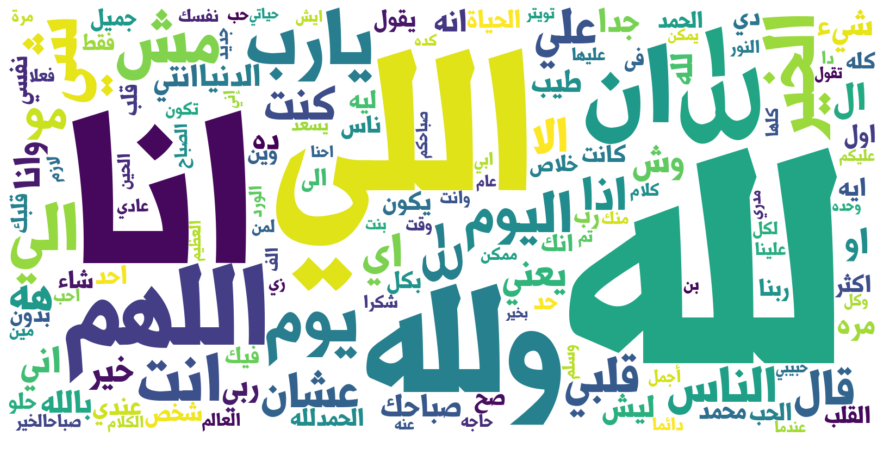

In [267]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from itertools import islice
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


text = " ".join(line for line in final_data['text'])
stop_ar = stopwords.words('arabic') 
# add more stop words here like numbers, special characters, etc. It should be customized for your project

top_words = {}
words = text.split()
for w in words:
    if w in stop_ar:
        continue
    else:
        if w not in top_words:
            top_words[w] = 1
        else:
            top_words[w] +=1

# Sort the dictionary of the most frequent words
top_words = {k: v for k, v in sorted(top_words.items(), key=lambda item: item[1], reverse = True)}

# select the first 150 most frequent words
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
for_wc = take(150, top_words.items())

# you need to reshape your words to be shown properly and turn the result into a dictionary
dic_data = {}
for t in for_wc:
    r = arabic_reshaper.reshape(t[0]) # connect Arabic letters
    bdt = get_display(r) # right to left
    dic_data[bdt] = t[1] 

# Plot
wc = WordCloud(background_color="white", width=1600, height=800,max_words=400 ,font_path='Shoroq-Font.ttf').generate_from_frequencies(dic_data)
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [268]:
final_data["text"] = final_data['text'].apply(lambda x:remove_repeating_char(x))

In [269]:
final_data["text"] = final_data['text'].apply(lambda x:normalize_arabic(x))

In [270]:
tokenizer = RegexpTokenizer(r'\w+')
final_data["text"] = final_data["text"].apply(tokenizer.tokenize)

In [271]:
final_data["text"].sample(5)

146360                                 [مصدومه, من, العالم]
25909     [انا, حرفيا, بمر, بفتره, سيئه, جدا, عشمي, في, ...
135718                            [يسعدلي, طلتك, ابو, مالك]
29896     [هذه, الجنبيه, مثل, حكومتنا, لا, تصلح, سلب, لا...
20970     [عاوز, تزود, فولورز, فولو, ليا, رتويت, لتويته,...
Name: text, dtype: object

In [272]:
stopwords_list = stopwords.words('arabic')
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [273]:
print(len(stopwords_list))

754


In [274]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [275]:
final_data["text"]=final_data["text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [276]:
final_data.head()

,sentiment,text
34344,pos,"[علي, النقا, والبياض, وصافي, النيه, نعامل, ناس..."
71631,pos,"[اليوم, السحب, اي, وقت, والي, يحالفه, الحظ, ال..."
90361,pos,"[ياحبني, اله, يرزقنا, دنيا, واخره, يارب, ميزه,..."
7785,pos,"[يارب, تصير, معجزه, افوز]"
44212,pos,"[موضه, الشباب, الحين, يحط, صورته, ويكتب, اصلا,..."


In [277]:
all_words = [word for tokens in final_data["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in final_data["text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1300693 words total, with a vocabulary size of 161561
Max sentence length is 1039


In [278]:
#wordcloud
counter = Counter(all_words)
counter.most_common(25)

[('اله', 19349),
 ('علي', 14817),
 ('الي', 12764),
 ('ان', 10376),
 ('انا', 10164),
 ('واله', 5978),
 ('الهم', 5065),
 ('الا', 4310),
 ('يارب', 4238),
 ('انت', 4012),
 ('يوم', 3407),
 ('اذا', 3360),
 ('الخير', 3350),
 ('شي', 3176),
 ('اي', 3139),
 ('اني', 3064),
 ('مش', 3042),
 ('ال', 2985),
 ('او', 2905),
 ('اليوم', 2785),
 ('حتي', 2781),
 ('قلبي', 2638),
 ('مو', 2509),
 ('الناس', 2485),
 ('وانا', 2457)]

In [279]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

In [280]:
y=final_data['sentiment']
y.value_counts()

neg    83523
pos    79975
Name: sentiment, dtype: int64

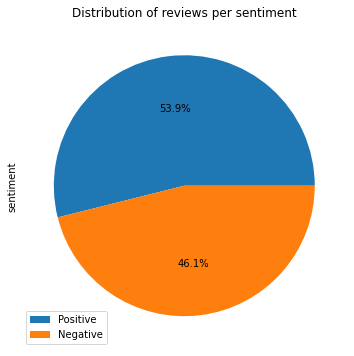

In [41]:
final_data['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%' )
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')


In [42]:
# احسب المصطلجات الفريت

In [43]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(final_data['text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

,اء,اب,ابا,ابتدايي,ابتسامتك,ابتسامه,ابتسم,ابتسمت,ابتسموا,ابتعد,...,يومه,يومها,يومي,يوميا,يومين,يونتان,يونس,يونقي,يوه,يويلي
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(final_data['sentiment'])
final_data['sentiment'] = encpro

In [45]:
y=final_data['sentiment']
X=unigramdata_features

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [47]:
y_test.value_counts()

1    19386
0    16855
Name: sentiment, dtype: int64

In [48]:
y_train.value_counts()



1    78293
0    66668
Name: sentiment, dtype: int64

In [49]:
print("Train Size: ", len(X_train))
print("Test Size:  ", len(X_test))

Train Size:  144961
Test Size:   36241


In [50]:
#ensemble model python code
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

In [51]:

y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.617


In [52]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.56      0.78      0.66     16855
           1       0.71      0.47      0.57     19386

    accuracy                           0.62     36241
   macro avg       0.64      0.63      0.61     36241
weighted avg       0.64      0.62      0.61     36241



In [53]:
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
RC

RidgeClassifier()

In [54]:
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))

Accuracy= 0.644


In [55]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60     16855
           1       0.65      0.71      0.68     19386

    accuracy                           0.64     36241
   macro avg       0.64      0.64      0.64     36241
weighted avg       0.64      0.64      0.64     36241



In [56]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1)

In [57]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy= 0.649


In [58]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61     16855
           1       0.66      0.70      0.68     19386

    accuracy                           0.65     36241
   macro avg       0.65      0.64      0.65     36241
weighted avg       0.65      0.65      0.65     36241



In [59]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf= clf.fit(X_train , y_train)
clf

RandomForestClassifier(n_estimators=10)

In [60]:
y_pred = clf.predict(X_test)
clf_1=clf.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy= 0.644


In [61]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62     16855
           1       0.67      0.66      0.67     19386

    accuracy                           0.64     36241
   macro avg       0.64      0.64      0.64     36241
weighted avg       0.64      0.64      0.64     36241



In [62]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "F1"]


x.add_row(["Naive Bayes Algorithm", round(nb_1,2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1,2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,2)])
x.add_row(["Random Forest Algorithm", round(clf_1,2)])

print(x)
print('\n')



Comparison of all algorithms on F1 score
+-------------------------------+------+
|             Model             |  F1  |
+-------------------------------+------+
|     Naive Bayes Algorithm     | 0.62 |
|   Ridge Classifier Algorithm  | 0.64 |
| Logistic Regression Algorithm | 0.65 |
|    Random Forest Algorithm    | 0.64 |
+-------------------------------+------+




In [64]:
tv=['  انا اليوم سعيد جدا عشان الهلال فاز ']

In [65]:
pred=clf.predict(word_vectorizer.transform(tv))
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (tv,prediction)

['  انا اليوم سعيد جدا عشان الهلال فاز ']   Prediction
0        pos


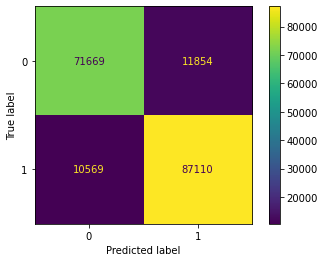

In [67]:
#clf=RandomForestClassifier(n_estimators=10)
#clf= clf.fit(X_train , y_train)

# make predictions with your classifier
y_pred = clf.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(clf, X, y)
plt.show()

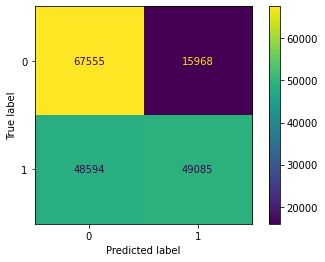

In [68]:
#nb = nb=GaussianNB()
#nb.fit(X_train , y_train) # fit your classifier

# make predictions with your classifier
y_pred = nb.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(nb, X, y)
plt.show()

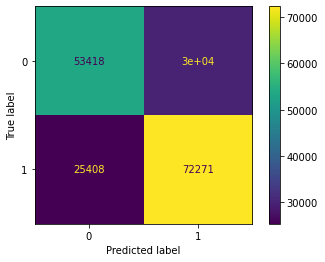

In [69]:
#LR= LogisticRegression(penalty = 'l2', C = 1)
#LR= LR.fit(X_train , y_train)

# make predictions with your classifier
y_pred = LR.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(LR, X, y)
plt.show()

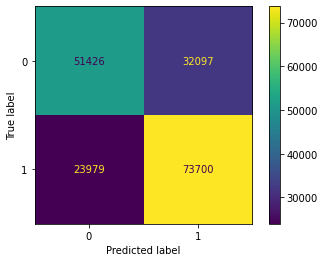

In [70]:
#RC= RidgeClassifier()
#RC.fit(X_train , y_train) # fit your classifier

# make predictions with your classifier
y_pred = RC.predict(X)         
# optional: get true negative (tn), false positive (fp)
# false negative (fn) and true positive (tp) from confusion matrix
M = confusion_matrix(y, y_pred)
tn, fp, fn, tp = M.ravel() 
# plotting the confusion matrix
plot_confusion_matrix(RC, X, y)
plt.show()